## En el enlace se encuentra la base de datos “quiebra.csv”que midelos años que tarda  en  quebrar  una  empresa  (desde  que se  crea  hasta  que quiebra),  

### la variable quebrar toma valores de 1 si la empresa quebró y 0 si esta censurada(no se observó la quiebra en el periodo de observación). 

### La variable mujer toma valores  de  0  si  el  fundador  de  la  empresa  es  hombre  y  1  si  el  fundador  de  la empresa  es  mujer.  
### La  variable  tiempo  mide  los  años  que  tardo  en  quebrar  la empresa. Responda en una notebook de Python cada inciso.
### raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/quiebra.csv

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# LIB ESPECIALES
from lifelines import ExponentialFitter

In [47]:
df_quiebra = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/quiebra.csv')

### a) Ajuste un modelo de supervivencia exponencial 

In [48]:
modelo_exp = ExponentialFitter().fit(df_quiebra['tiempo'], df_quiebra['quebrar'])

In [49]:
modelo_exp.print_summary()

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 100 total observations, 52 right-censored observations>
   number of observations = 100
number of events observed = 48
           log-likelihood = -212.48
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  30.77       4.44            22.07            39.48

          cmp to    z      p   -log2(p)
lambda_     0.00 6.93 <0.005      37.77
---
AIC = 426.95

#### b) Grafique la función de riesgo exponencial

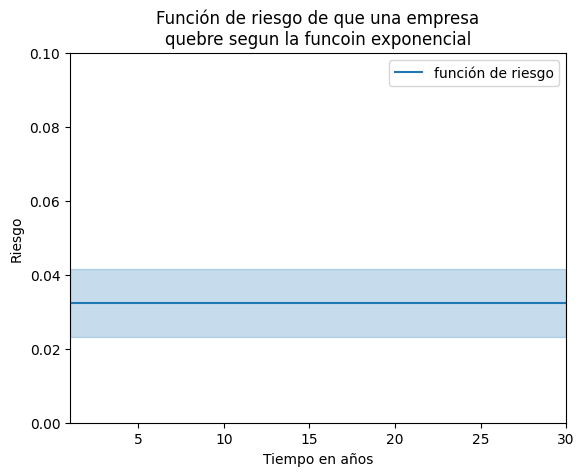

In [50]:
modelo_exp.plot_hazard(label='función de riesgo')
plt.xlim(1,30)
plt.ylim(0,0.1)
plt.xlabel('Tiempo en años')
plt.ylabel('Riesgo')
plt.title('Función de riesgo de que una empresa\nquebre segun la funcoin exponencial')
plt.show()

#### c) ¿Cuáles  el  riesgo  de  que una empresa  quiebre  según  la  función exponencial?

In [51]:
modelo_exp.hazard_

,Exponential_estimate
1.000000,0.032498
1.292929,0.032498
1.585859,0.032498
1.878788,0.032498
2.171717,0.032498
...,...
28.828283,0.032498
29.121212,0.032498
29.414141,0.032498
29.707071,0.032498


## 4.-Con  la  base  de  datos del  punto  3 responda en  la  misma  notebook  lo siguiente:
### a) Ajuste un modelo Weibull de supervivencia 

In [52]:
from lifelines import WeibullFitter

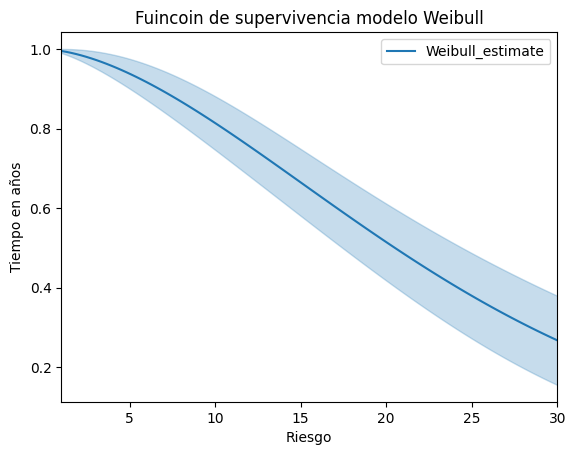

In [53]:
modelo_wibll = WeibullFitter().fit(df_quiebra['tiempo'], df_quiebra['quebrar'])
modelo_wibll.plot_survival_function()
plt.title('Fuincoin de supervivencia modelo Weibull')
plt.xlabel('Riesgo')
plt.ylabel('Tiempo en años')
plt.xlim(1,30)
plt.show()

### b) Grafique la función de riesgo

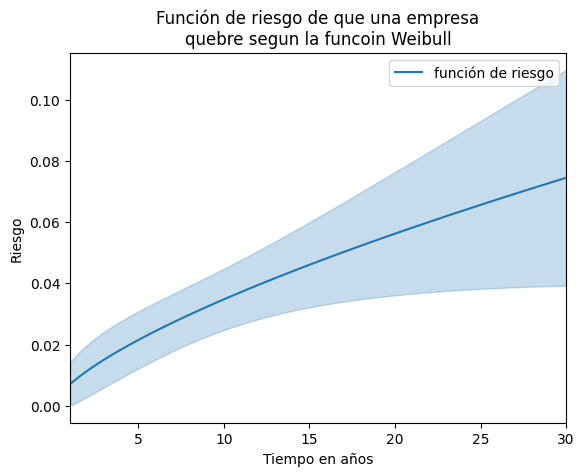

In [54]:
modelo_wibll.plot_hazard(label='función de riesgo')
plt.title('Función de riesgo de que una empresa\nquebre segun la funcoin Weibull')
plt.xlim(1,30)
plt.xlabel('Tiempo en años')
plt.ylabel('Riesgo')
plt.show()

### c) ¿Qué forma tiene la función de riesgo? y ¿qué significa? 

In [55]:
beta = modelo_wibll.params_['lambda_']
print(f'La funcion de riesgo tiene una forma creciente, lo que significa\nque la beta es mayor a 1 (beta = {round(beta,2)}) y que mientras mas pase\nel tiempo es mas probable que la empresa quiebre.')

La funcion de riesgo tiene una forma creciente, lo que significa
que la beta es mayor a 1 (beta = 25.46) y que mientras mas pase
el tiempo es mas probable que la empresa quiebre.


## 5.-Con  la  base  de  datos  del  punto  3  responda  en  la  misma  notebook  lo siguiente:

In [56]:
from lifelines import LogNormalFitter

### a) Ajuste un modelo Log-Normal

In [57]:
modelo_log = LogNormalFitter().fit(df_quiebra['tiempo'], df_quiebra['quebrar'])

### b) Grafique la función de riesgo 

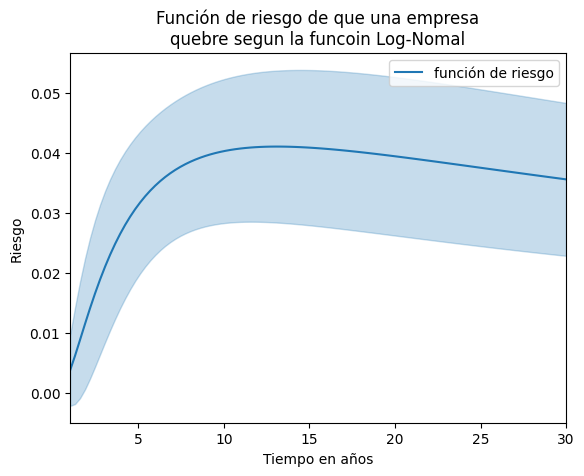

In [58]:
modelo_log.plot_hazard(label='función de riesgo')
plt.title('Función de riesgo de que una empresa\nquebre segun la funcoin Log-Nomal')
plt.xlim(1,30)
plt.xlabel('Tiempo en años')
plt.ylabel('Riesgo')
plt.show()

### c) En qué periodo el riesgo de quebrar es creciente y en cuál decreciente

In [59]:
print('De el periodo 1 a 12aprox el riesgo es creciente.\nY despues de ese periodo el riesgo es decreciente.')

De el periodo 1 a 12aprox el riesgo es creciente.
Y despues de ese periodo el riesgo es decreciente.


## 6.-Utilizando  elestimador  de  Kaplan-Meierrealice  una  notebook  en  Python para responder lo siguiente:

In [60]:
from lifelines import KaplanMeierFitter

### a) Estime   la   función   de   supervivencia   y   la   mediana   de   tiempo   de supervivencia y diga que significa.

In [61]:
modelo_km = KaplanMeierFitter().fit(df_quiebra['tiempo'], df_quiebra['quebrar'])
mediana = modelo_km.median_survival_time_
print(f'la mediana es: {mediana}\n\nFuncion de supervivencia:\n{modelo_km.survival_function_}\n\n')
print(f'Debido a que la mediana es {mediana} esto significa que la mayoria de las empresas sobreviven mas de 23 años.')
print('Analizando la funcion de supervivencia, se puede apreciar que en un inicio la probabilidad de quebrar es\nmuy baja, asi como lo corrobara la mediana.')

la mediana es: 23.0

Funcion de supervivencia:
          KM_estimate
timeline             
0.0          1.000000
1.0          0.990000
2.0          0.959694
3.0          0.928400
4.0          0.928400
5.0          0.917477
7.0          0.873261
8.0          0.829046
9.0          0.829046
10.0         0.791924
11.0         0.766378
12.0         0.726043
14.0         0.726043
15.0         0.711225
16.0         0.664841
17.0         0.664841
18.0         0.646373
19.0         0.627362
20.0         0.607757
21.0         0.586800
22.0         0.543333
23.0         0.475417
24.0         0.475417
25.0         0.404104
26.0         0.378848
27.0         0.320563
28.0         0.291421
29.0         0.259041
30.0         0.129521


Debido a que la mediana es 23.0 esto significa que la mayoria de las empresas sobreviven mas de 23 años.
Analizando la funcion de supervivencia, se puede apreciar que en un inicio la probabilidad de quebrar es
muy baja, asi como lo corrobara la mediana.


### b) Estime  la  función  de  supervivencia  por  Kaplan-meier  para  hombres  y mujeres  y  grafique  con .plot_survival_function(ci_show=False) y  diga  si  las empresas administradas por hombres/mujeres quiebran más rápido. No olvide etiquetar cada línea y agregar todos los elementos en cada gráfica.

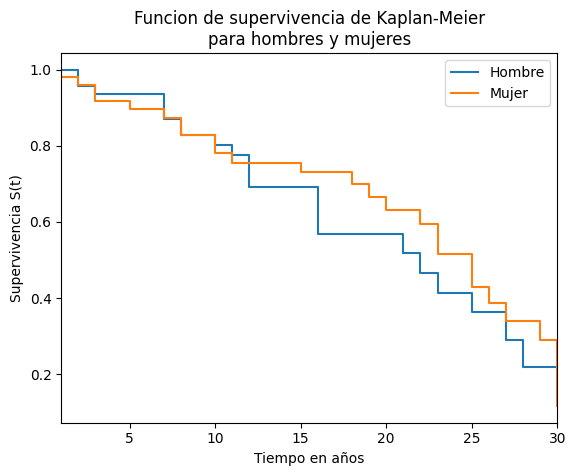

A simple vista, las 2 funciones de supervivencia son muy parecidas con una ligera inclinacoin a favor de las mujeres.
Sinembargo, no es suficiente para afirmar que las empresas fundadas por hombres son mas propensas a quebrar


In [62]:
mujer = df_quiebra.query('mujer == 1')
hombre = df_quiebra.query('mujer == 0')

km_mujer = KaplanMeierFitter().fit(mujer['tiempo'], mujer['quebrar'])
km_hombre = KaplanMeierFitter().fit(hombre['tiempo'], hombre['quebrar'])

km_hombre.plot_survival_function(label='Hombre', ci_show=False)
km_mujer.plot_survival_function(label='Mujer', ci_show=False)

plt.title('Funcion de supervivencia de Kaplan-Meier\npara hombres y mujeres')
plt.xlabel('Tiempo en años')
plt.ylabel('Supervivencia S(t)')
plt.xlim(1,30)
plt.show()

print('A simple vista, las 2 funciones de supervivencia son muy parecidas con una ligera inclinacoin a favor de las mujeres.\nSinembargo, no es suficiente para afirmar que las empresas fundadas por hombres son mas propensas a quebrar')

### c) El profesor cree que las empresas fundadaspor hombres quiebran más rápido,   refute   o   confirme   con   evidencia   estadística   tal   afirmación (pruebas de hipótesis, graficas, tablas etc.)

In [63]:
from lifelines.statistics import logrank_test

In [64]:
print('Mediante una prueba de hipotesis')

print('Ho: s(mujere) = s(hombre) ; Funciones de supervivencia iguales\nHa: s(mujere) != s(hombre) ; Funciones de supervivencia diferentes')


prueba_hipotesis = logrank_test(mujer['tiempo'], hombre['tiempo'], mujer['quebrar'], hombre['quebrar'])
prueba_hipotesis.print_summary()

print('Si p_valor < alfa(5%), rechazaremos Ho\nSi p_valor >= alfa(5%), no rechazamos Ho\n')
p_valor = prueba_hipotesis.p_value
if p_valor < 0.05:
    print(f'El p_valor = {p_valor.round(2)} < 0.05\nRechazamos H0 y las empresas fundadas por hombres son mas propensas a quebrar')
else:
    print(f'El p_valor = {p_valor.round(2)} >= 0.05\nNo rechazamos H0\nLas empresas fundadas por hombres y mujeres son igualmente propensas a quebrar')

Mediante una prueba de hipotesis
Ho: s(mujere) = s(hombre) ; Funciones de supervivencia iguales
Ha: s(mujere) != s(hombre) ; Funciones de supervivencia diferentes


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.28 0.59      0.75

Si p_valor < alfa(5%), rechazaremos Ho
Si p_valor >= alfa(5%), no rechazamos Ho

El p_valor = 0.59 >= 0.05
No rechazamos H0
Las empresas fundadas por hombres y mujeres son igualmente propensas a quebrar


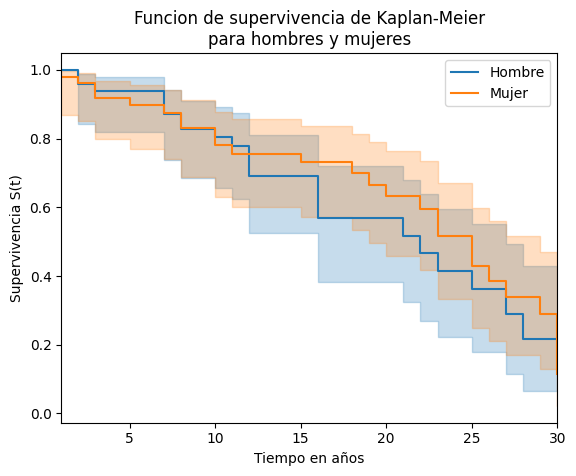

Mediante los intervalos de confianza, podemos notar que en todo momento se sobreponen.
Por lo tanto, no se puede asegurar que los hombres sean maspropensos a quebrar su empresa


In [65]:
km_hombre.plot_survival_function(label='Hombre')
km_mujer.plot_survival_function(label='Mujer')

plt.title('Funcion de supervivencia de Kaplan-Meier\npara hombres y mujeres')
plt.xlabel('Tiempo en años')
plt.ylabel('Supervivencia S(t)')
plt.xlim(1,30)
plt.show()

print('Mediante los intervalos de confianza, podemos notar que en todo momento se sobreponen.\nPor lo tanto, no se puede asegurar que los hombres sean maspropensos a quebrar su empresa')